# **Lõputöö "Naiste ja meeste lõpphinnete erinevuste uurimine Tartu Ülikooli informaatika eriala kursustel" andmeanalüüs**

# Anne-Mari Kasemetsa
# 2023/24

# **Eeltöötlus**
Vajalik iga järgneva bloki jooksutamiseks.
Eeltöötluses puhastatakse andmeid, jaotatakse õppeainete põhjal andmestikeks ning tegeletakse kordussooritustega

## Impordid

In [83]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/LOPUTOO')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency as chi2_contingency

## Puhastamine

In [85]:
path = os.getcwd() + '/' + 'loputoo_andmestik.xlsx'
df = pd.read_excel(path, sheet_name='Andmed')

In [86]:
df.head()

,TUDENGI_NR,SUGU,AINE,ÕPPEAASTA,SEMESTER,HINDE_NIMETUS_EK,KORDUSSOORITUS
0,216,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,F - puudulik,NaN
1,415,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,mitteilmunud,NaN
2,467,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,F - puudulik,NaN
3,572,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,D - rahuldav,NaN
4,702,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,A - suurepärane,NaN


In [87]:
# nimed muutujatesse
km = 'MTMM.00.340 Kõrgem matemaatika I (6 EAP)'
oop = 'LTAT.03.003 Objektorienteeritud programmeerimine (6 EAP)'
ab = 'LTAT.03.004 Andmebaasid (6 EAP)'
algod = 'LTAT.03.005 Algoritmid ja andmestruktuurid (6 EAP)'
opsys = 'LTAT.06.001 Operatsioonisüsteemid (6 EAP)'
dm = 'LTMS.00.019 Diskreetne matemaatika I (6 EAP)'

In [88]:
hinded = {'A - suurepärane' : 5, 'B - väga hea' : 4, 'C - hea' : 3, 'D - rahuldav' : 2,
          'E - kasin' : 1, 'F - puudulik' : 0, 'mitteilmunud': 0}

In [89]:
aastad = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23']

In [90]:
grades_mapping = {'A - suurepärane': 'A', 'B - väga hea': 'B', 'C - hea': 'C', 'D - rahuldav': 'D', 'E - kasin': 'E', 'F - puudulik': 'F', 'mitteilmunud': 'MI'}

In [91]:
hinnete_jarjekord = ['A', 'B', 'C', 'D', 'E', 'F', 'MI']

In [92]:
#lisan uue veeru, kus on hinded numbritena
df['HINNE_NR'] = df['HINDE_NIMETUS_EK'].map(hinded)
# muudan kordussoorituse puudumise märgise NaN-i nulliks
df['KORDUSSOORITUS'] = df['KORDUSSOORITUS'].fillna('0')
# muudan hinde_nimetus_ek nii, et hinne on ainult täht
grades_mapping = {'A - suurepärane': 'A', 'B - väga hea': 'B', 'C - hea': 'C', 'D - rahuldav': 'D', 'E - kasin': 'E', 'F - puudulik': 'F', 'mitteilmunud': 'MI'}
df['HINDE_NIMETUS_EK'] = df['HINDE_NIMETUS_EK'].replace(grades_mapping)
# muudan veergude nimesid
df = df.rename(columns={'HINDE_NIMETUS_EK': "HINNE_EK", "TUDENGI_NR": "ID"})
print(df)

        ID SUGU                                          AINE ÕPPEAASTA  \
0      216    M      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
1      415    N      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
2      467    M      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
3      572    N      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
4      702    M      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
...    ...  ...                                           ...       ...   
8817  1052    N  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   
8818  2450    M  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   
8819   926    M  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   
8820   652    M  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   
8821  2394    M  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   

     SEMESTER HINNE_EK KORDUSSOORITUS  HINNE_NR  
0           S        F              0         0  

In [93]:
#andmestikud iga õppeaine kohta eraldi
KM = df[df['AINE'] == km]
OOP = df[df['AINE'] == oop]
AB = df[df['AINE'] == ab]
ALGOD = df[df['AINE'] == algod]
OPSYS = df[df['AINE'] == opsys]
DM = df[df['AINE'] == dm]

In [94]:
andmestikud = [KM, OOP, AB, ALGOD, OPSYS, DM]

**Kordussooritustega tegelemine**

In [95]:
# iga õppeaine andmestik käiakse läbi, kus omakorda käiakse läbi kõik unikaalsed ID-d (mis esindab ühe ja sama õpilase hindeid)
# iga õpilase puhul jäetakse alles ainult kõige viimane sooritus
# seega pärast seda meetodit jääb iga õpilase puhul alles ainult üks lõpphinne ja see oli selle õpilase kõige viimasena sooritatud eksami tulemus

for andmestik in andmestikud:
  print("Andmestik on ", andmestik.AINE)
  algne = andmestik.copy()
  for student_id in andmestik['ID'].unique():
    # leiame mitu sooritust see tudeng selles aines tegi
    student_rows = andmestik[andmestik['ID'] == student_id]
    if len(student_rows) > 1:
        # kui on kordussooritusi
        if '*' in student_rows['KORDUSSOORITUS'].values:
            # kustutame kõik, mis ei ole kordussoorituse märgiga (kuna need on esimesed sooritused)
            andmestik = andmestik.drop(student_rows[student_rows['KORDUSSOORITUS'] == '0'].index)
            # kustutame kõik kordussoorituse märgiga, mis ei ole kõige viimane
            andmestik = andmestik.drop(student_rows[student_rows['KORDUSSOORITUS'] == '*'].index[:-1])
        else:
        # kui ei ole kordussooritusi, siis jääb ainult esimene sooritus
            pass
  andmestik = andmestik.reset_index(drop=True)
  # kontrollime, et kõik läks õigesti
  unik_id_algne = algne['ID'].nunique()
  unik_id_parast = andmestik['ID'].nunique()
  print("Unikaasete ID arv algselt:", unik_id_algne)
  print("Unikaalsete ID arv parast:", unik_id_parast)
  print("Algselt ridu: ", algne.shape[0])
  print("Parast ridu: ", andmestik.shape[0])
  print("*********************************************************************")

Andmestik on  0       MTMM.00.340 Kõrgem matemaatika I (6 EAP)
1       MTMM.00.340 Kõrgem matemaatika I (6 EAP)
2       MTMM.00.340 Kõrgem matemaatika I (6 EAP)
3       MTMM.00.340 Kõrgem matemaatika I (6 EAP)
4       MTMM.00.340 Kõrgem matemaatika I (6 EAP)
                          ...                   
2518    MTMM.00.340 Kõrgem matemaatika I (6 EAP)
2519    MTMM.00.340 Kõrgem matemaatika I (6 EAP)
2520    MTMM.00.340 Kõrgem matemaatika I (6 EAP)
2521    MTMM.00.340 Kõrgem matemaatika I (6 EAP)
2522    MTMM.00.340 Kõrgem matemaatika I (6 EAP)
Name: AINE, Length: 2523, dtype: object
Unikaasete ID arv algselt: 1888
Unikaalsete ID arv parast: 1888
Algselt ridu:  2523
Parast ridu:  1888
*********************************************************************
Andmestik on  2523    LTAT.03.003 Objektorienteeritud programmeerimi...
2524    LTAT.03.003 Objektorienteeritud programmeerimi...
2525    LTAT.03.003 Objektorienteeritud programmeerimi...
2526    LTAT.03.003 Objektorienteeritud progra

# **Õppeainete analüüs**

## **KM analüüs**



1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste



### hinnete analüüs - tabel hinnetest ning kogustest + statistilised näitajad

In [96]:
# kõrgema matemaatika hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[KM['ÕPPEAASTA'], KM['SUGU']], columns=KM['HINNE_EK'])
cross_tab.to_excel('KM_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E    F  MI
ÕPPEAASTA SUGU                             
2018/19   M     41  18  29  40  70  108  13
          N     27  22  18  26  29   48  15
2019/20   M     41  24  32  42  59  115  11
          N     23  18  20  25  44   75   9
2020/21   M     23  29  26  43  39  109   6
          N     16  13  32  28  13   32   3
2021/22   M     17  22  23  51  71  142  12
          N      8   7  17  33  45   67   9
2022/23   M     29  21  34  35  56  197  10
          N      8  12  17  23  25   71   7


In [97]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = KM.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('KM_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  1.611285    1.0  1.751728
1   2018/19    N  1.935135    2.0  1.849238
2   2019/20    M  1.666667    1.0  1.780528
3   2019/20    N  1.593458    1.0  1.738316
4   2020/21    M  1.578182    1.0  1.707721
5   2020/21    N  2.167883    2.0  1.665256
6   2021/22    M  1.227811    1.0  1.491279
7   2021/22    N  1.236559    1.0  1.390297
8   2022/23    M  1.196335    0.0  1.633214
9   2022/23    N  1.288344    1.0  1.554460

### kontrollime, kas normaaljaotusega - Shapiro test. Vastus: EI

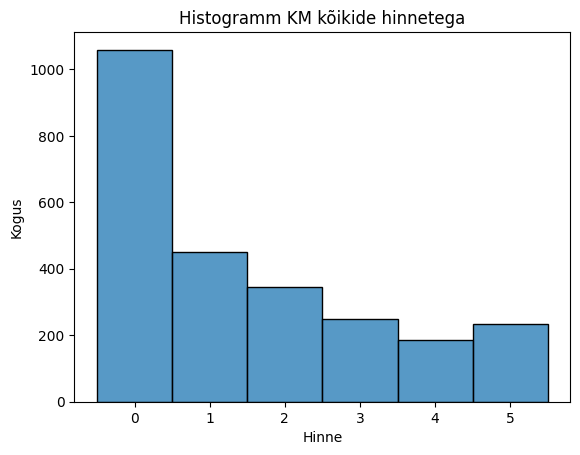

Shapiro-Wilk test KM kõikide hinnetega - p-val: 0.0
Ei ole normaaljaotus


In [98]:
# sorteerime hinnete järgi
KM_sorted = KM.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=KM_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm KM kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(KM['HINNE_NR'])
print(f'Shapiro-Wilk test KM kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann Whitney U test

In [99]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in KM['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = KM[(KM['ÕPPEAASTA'] == aasta) & (KM['SUGU'] == 'M')]['HINNE_NR']
  grades_f = KM[(KM['ÕPPEAASTA'] == aasta) & (KM['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])
  results = results._append(udf)

results.to_excel('KM_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2019/20    35333.5  0.695753    False
0  2018/19    26797.0  0.075769    False
0  2022/23    29461.5  0.281896    False
0  2021/22    30528.5  0.565097    False
0  2020/21    14976.5  0.000471     True


### Hii ruut


In [100]:
# kontroll, et väärtust ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D   E    F  MI
ÕPPEAASTA SUGU                             
2018/19   M     41  18  29  40  70  108  13
          N     27  22  18  26  29   48  15
2019/20   M     41  24  32  42  59  115  11
          N     23  18  20  25  44   75   9
2020/21   M     23  29  26  43  39  109   6
          N     16  13  32  28  13   32   3
2021/22   M     17  22  23  51  71  142  12
          N      8   7  17  33  45   67   9
2022/23   M     29  21  34  35  56  197  10
          N      8  12  17  23  25   71   7

In [101]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('KM_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,4.956785,0.025988,Jah,24.97,29.15
0,keskmised_hinded,0.962840,0.326472,Ei,30.89,32.88
0,halvad_hinded,8.737985,0.003116,Jah,44.14,37.97
0,A,0.000000,1.000000,Ei,9.22,9.27
0,B,0.997585,0.317895,Ei,6.96,8.14
0,C,5.351400,0.020706,Jah,8.79,11.75
0,D,2.536648,0.111231,Ei,12.88,15.25
0,E,0.034206,0.853270,Ei,18.01,17.63
0,F,14.693267,0.000126,Jah,40.96,33.11
0,MI,4.044675,0.044311,Jah,3.17,4.86


## **OOP analüüs**



1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste



### hinnete analüüs + statistilised näitajad

In [102]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = OOP.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('OOP_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  2.696000    3.0  1.885152
1   2018/19    N  2.655556    3.0  1.908945
2   2019/20    M  3.282511    4.0  1.932652
3   2019/20    N  3.775000    5.0  1.785844
4   2020/21    M  3.119403    4.0  1.875012
5   2020/21    N  3.518072    4.0  1.720475
6   2021/22    M  3.421687    4.0  1.727640
7   2021/22    N  3.506173    4.0  1.703845
8   2022/23    M  3.762115    4.0  1.547413
9   2022/23    N  3.903846    4.0  1.504164

In [103]:
# hinnete analüüs - exceli tabelisse
cross_tab = pd.crosstab(index=[OOP['ÕPPEAASTA'], OOP['SUGU']], columns=OOP['HINNE_EK'])
cross_tab.to_excel('OOP_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK          A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                             
2018/19   M      58  51  33  29  23  35  21
          N      21  16  13  15   1  15   9
2019/20   M      92  36  34  12   2  26  21
          N      43  16   5   4   0  10   2
2020/21   M      68  35  36  18   3  25  16
          N      30  26  10   3   2   9   3
2021/22   M      60  39  30  10   2  13  12
          N      30  21  14   4   0   9   3
2022/23   M     100  56  33  15   1  18   4
          N      48  32  10   4   0   5   5


### kontrollime normaaljaotust - Shapiro test. Vastus: EI

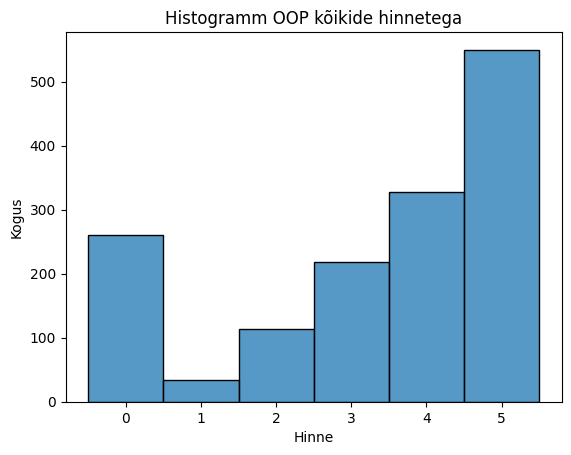

Shapiro-Wilk test OOP kõikide hinnetega - p-val: 2.2821518764024684e-39
Ei ole normaaljaotus


In [104]:
# sorteerime hinnete järgi
OOP_sorted = OOP.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=OOP_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm OOP kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(OOP['HINNE_NR'])
print(f'Shapiro-Wilk test OOP kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitmany U test

In [105]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in OOP['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = OOP[(OOP['ÕPPEAASTA'] == aasta) & (OOP['SUGU'] == 'M')]['HINNE_NR']
  grades_f = OOP[(OOP['ÕPPEAASTA'] == aasta) & (OOP['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('OOP_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19    11434.5  0.814489    False
0  2019/20     7529.0  0.028957     True
0  2021/22     6543.5  0.724486    False
0  2022/23    11167.0  0.403430    False
0  2020/21     7380.0  0.114917    False


### Hii ruut

In [106]:
# kontroll, ega ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK          A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                             
2018/19   M      58  51  33  29  23  35  21
          N      21  16  13  15   1  15   9
2019/20   M      92  36  34  12   2  26  21
          N      43  16   5   4   0  10   2
2020/21   M      68  35  36  18   3  25  16
          N      30  26  10   3   2   9   3
2021/22   M      60  39  30  10   2  13  12
          N      30  21  14   4   0   9   3
2022/23   M     100  56  33  15   1  18   4
          N      48  32  10   4   0   5   5

In [107]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('OOP_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,3.925082,0.047571,Jah,71.32,76.48
0,keskmised_hinded,3.327924,0.068113,Ei,10.78,7.53
0,halvad_hinded,0.669430,0.413250,Ei,17.90,15.98
0,A,1.815380,0.177864,Ei,35.43,39.27
0,B,4.275067,0.038675,Jah,20.34,25.34
0,C,3.114076,0.077618,Ei,15.56,11.87
0,D,0.329737,0.565814,Ei,7.87,6.85
0,E,5.964345,0.014598,Jah,2.91,0.68
0,F,0.000000,1.000000,Ei,10.97,10.96
0,MI,1.595167,0.206589,Ei,6.94,5.02


## **Algode analüüüs**



1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste



### hinnete analüüs, statistilised näitajad

In [108]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = ALGOD.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('Algod_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  1.735849    1.0  1.564855
1   2018/19    N  1.914894    2.0  1.585667
2   2019/20    M  1.812500    1.0  1.726374
3   2019/20    N  2.020833    2.0  1.731923
4   2020/21    M  2.510638    2.0  1.860048
5   2020/21    N  2.619048    3.0  1.707938
6   2021/22    M  1.683871    1.0  1.642594
7   2021/22    N  1.819672    1.0  1.839458
8   2022/23    M  1.951515    2.0  1.783413
9   2022/23    N  1.492754    1.0  1.605351

In [109]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[ALGOD['ÕPPEAASTA'], ALGOD['SUGU']], columns=ALGOD['HINNE_EK'])
cross_tab.to_excel('Algod_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M      8  17  30  23  32  40   9
          N      3   5  10   9   7   9   4
2019/20   M     20  21  24  28  36  53  10
          N      5  10   0  10  12   9   2
2020/21   M     48  15  27  29  33  31   5
          N     10  13  12  10   7  10   1
2021/22   M     16  11  15  26  40  42   5
          N      9   5   7   6  13  20   1
2022/23   M     25  14  17  29  32  30  18
          N      5   3  11  12   9  25   4


### kontrollime normaaljaotust - Shapiro - vastus: EI

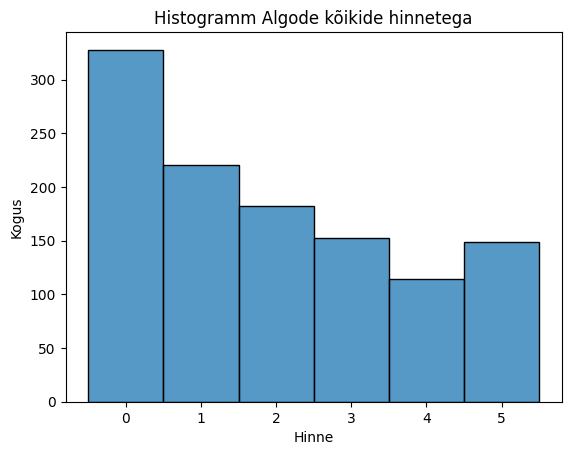

Shapiro-Wilk test Algod kõikide hinnetega - p-val: 1.620133044766584e-29
Ei ole normaaljaotus


In [110]:
# sorteerime hinnete järgi
ALGOD_sorted = ALGOD.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=ALGOD_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm Algode kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(ALGOD['HINNE_NR'])
print(f'Shapiro-Wilk test Algod kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitney U test

In [111]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in ALGOD['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = ALGOD[(ALGOD['ÕPPEAASTA'] == aasta) & (ALGOD['SUGU'] == 'M')]['HINNE_NR']
  grades_f = ALGOD[(ALGOD['ÕPPEAASTA'] == aasta) & (ALGOD['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('Algod_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     3499.5  0.499955    False
0  2019/20     4242.5  0.385167    False
0  2022/23     6525.0  0.070552    False
0  2021/22     4656.5  0.860976    False
0  2020/21     5743.0  0.716045    False


### Hii ruut

In [112]:
# kontroll, ega ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M      8  17  30  23  32  40   9
          N      3   5  10   9   7   9   4
2019/20   M     20  21  24  28  36  53  10
          N      5  10   0  10  12   9   2
2020/21   M     48  15  27  29  33  31   5
          N     10  13  12  10   7  10   1
2021/22   M     16  11  15  26  40  42   5
          N      9   5   7   6  13  20   1
2022/23   M     25  14  17  29  32  30  18
          N      5   3  11  12   9  25   4

In [113]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('Algod_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,0.186182,0.666114,Ei,35.86,37.50
0,keskmised_hinded,0.658457,0.417105,Ei,35.86,32.99
0,halvad_hinded,0.104233,0.746807,Ei,28.29,29.51
0,A,0.989855,0.319778,Ei,13.62,11.11
0,B,2.448732,0.117620,Ei,9.08,12.50
0,C,0.047064,0.828252,Ei,13.15,13.89
0,D,0.022319,0.881241,Ei,15.72,16.32
0,E,1.456669,0.227461,Ei,20.14,16.67
0,F,0.634554,0.425690,Ei,22.82,25.35
0,MI,0.508935,0.475600,Ei,5.47,4.17


## **Diskmat analüüs**


1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste


### hinnete analüüs, statistilised näitajad

In [114]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = DM.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('DM_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  1.956522    2.0  1.747669
1   2018/19    N  1.830769    1.0  1.924913
2   2019/20    M  2.278409    2.0  1.862959
3   2019/20    N  2.436364    3.0  1.792615
4   2020/21    M  1.132450    0.0  1.606966
5   2020/21    N  1.358974    1.0  1.545621
6   2021/22    M  1.027027    0.0  1.479690
7   2021/22    N  0.940299    1.0  1.057163
8   2022/23    M  1.248619    1.0  1.386066
9   2022/23    N  1.227848    1.0  1.386282

In [115]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[DM['ÕPPEAASTA'], DM['SUGU']], columns=DM['HINNE_EK'])
cross_tab.to_excel('DM_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     21  16  19  32  25  26  22
          N     12   4   6   6  13  14  10
2019/20   M     35  22  18  24  36  16  25
          N      8  10  13   4   7   4   9
2020/21   M     12   7   9  16  24  60  23
          N      5   3  11  10  16  21  12
2021/22   M     13   5   9  17  44  91   6
          N      0   1   5  14  16  31   0
2022/23   M      4  13  15  38  33  78   0
          N      3   3   7  17  15  34   0


### kontrollime normaaljaotust - Shapiro - vastus: EI

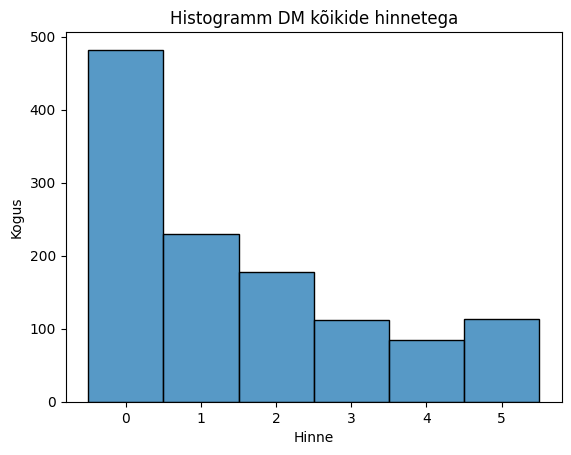

Shapiro-Wilk test DM kõikide hinnetega - p-val: 1.3090230474416365e-34
Ei ole normaaljaotus


In [116]:
# sorteerime hinnete järgi
DM_sorted = DM.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=DM_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm DM kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(DM['HINNE_NR'])
print(f'Shapiro-Wilk test DM kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitney U test

In [117]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in DM['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = DM[(DM['ÕPPEAASTA'] == aasta) & (DM['SUGU'] == 'M')]['HINNE_NR']
  grades_f = DM[(DM['ÕPPEAASTA'] == aasta) & (DM['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('DM_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     5547.5  0.469025    False
0  2021/22     5912.5  0.546855    False
0  2022/23     7201.5  0.922602    False
0  2020/21     5204.5  0.121022    False
0  2019/20     4646.5  0.650139    False


### Hii ruut

In [118]:
# kontroll, et ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     21  16  19  32  25  26  22
          N     12   4   6   6  13  14  10
2019/20   M     35  22  18  24  36  16  25
          N      8  10  13   4   7   4   9
2020/21   M     12   7   9  16  24  60  23
          N      5   3  11  10  16  21  12
2021/22   M     13   5   9  17  44  91   6
          N      0   1   5  14  16  31   0
2022/23   M      4  13  15  38  33  78   0
          N      3   3   7  17  15  34   0

In [119]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('DM_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,0.066908,0.795893,Ei,25.53,26.45
0,keskmised_hinded,0.007259,0.932104,Ei,33.84,34.30
0,halvad_hinded,0.143018,0.705299,Ei,40.63,39.24
0,A,0.743825,0.388438,Ei,9.95,8.14
0,B,0.429397,0.512285,Ei,7.38,6.10
0,C,4.197350,0.040487,Jah,8.20,12.21
0,D,0.000000,1.000000,Ei,14.87,14.83
0,E,0.014589,0.903860,Ei,18.97,19.48
0,F,0.191704,0.661502,Ei,31.73,30.23
0,MI,0.000000,1.000000,Ei,8.90,9.01


## **Andmebaasid analüüs**


1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste


### hinnete analüüs, statistilised andmed

In [120]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = AB.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('AB_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  3.185393    4.0  1.830196
1   2018/19    N  3.391892    4.0  1.773608
2   2019/20    M  3.133333    4.0  1.987109
3   2019/20    N  3.461538    4.0  1.879802
4   2020/21    M  2.774566    3.0  2.009003
5   2020/21    N  3.584615    4.0  1.784414
6   2021/22    M  2.965909    3.0  1.813907
7   2021/22    N  3.586957    4.0  1.276604
8   2022/23    M  2.811245    3.0  1.753026
9   2022/23    N  3.072000    4.0  1.704718

In [121]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[AB['ÕPPEAASTA'], AB['SUGU']], columns=AB['HINNE_EK'])
cross_tab.to_excel('AB_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D  E   F  MI
ÕPPEAASTA SUGU                           
2018/19   M     58  37  33  15  0  15  20
          N     28  15  13   6  0   3   9
2019/20   M     67  31  31   6  0  45   0
          N     29  12   8   4  0  12   0
2020/21   M     47  35  27  12  0  44   8
          N     29  15   6   5  0  10   0
2021/22   M     39  48  37  12  0  33   7
          N     20  38  23   4  1   5   1
2022/23   M     41  65  66  17  3  39  18
          N     25  42  21  13  2  18   4


### kontrollime normaaljaotust - Shapiro - Vastus: EI

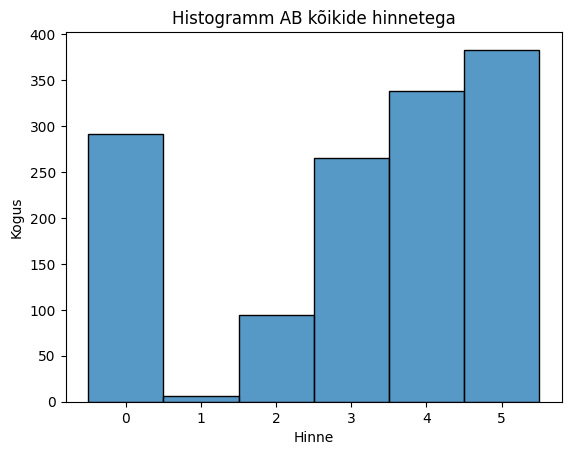

Shapiro-Wilk test AB kõikide hinnetega - p-val: 1.117897351772918e-36
Ei ole normaaljaotus


In [122]:
# sorteerime hinnete järgi
AB_sorted = AB.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=AB_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm AB kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(AB['HINNE_NR'])
print(f'Shapiro-Wilk test AB kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitney U test

In [123]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in AB['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = AB[(AB['ÕPPEAASTA'] == aasta) & (AB['SUGU'] == 'M')]['HINNE_NR']
  grades_f = AB[(AB['ÕPPEAASTA'] == aasta) & (AB['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('AB_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     6148.0  0.391420    False
0  2021/22     6802.5  0.026841     True
0  2022/23    14097.0  0.127211    False
0  2020/21     4267.0  0.003105     True
0  2019/20     5287.5  0.230974    False


### Hii ruut

In [124]:
# kontroll, et ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D  E   F  MI
ÕPPEAASTA SUGU                           
2018/19   M     58  37  33  15  0  15  20
          N     28  15  13   6  0   3   9
2019/20   M     67  31  31   6  0  45   0
          N     29  12   8   4  0  12   0
2020/21   M     47  35  27  12  0  44   8
          N     29  15   6   5  0  10   0
2021/22   M     39  48  37  12  0  33   7
          N     20  38  23   4  1   5   1
2022/23   M     41  65  66  17  3  39  18
          N     25  42  21  13  2  18   4

In [125]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('AB_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,8.176319,0.004244,Jah,69.25,76.96
0,keskmised_hinded,0.783133,0.376185,Ei,6.80,8.31
0,halvad_hinded,14.382370,0.000149,Jah,23.95,14.73
0,A,3.060980,0.080193,Ei,26.36,31.12
0,B,6.092594,0.013575,Jah,22.59,28.98
0,C,1.995334,0.157784,Ei,20.29,16.86
0,D,0.409968,0.521986,Ei,6.49,7.60
0,E,0.349358,0.554477,Ei,0.31,0.71
0,F,10.032235,0.001538,Jah,18.41,11.40
0,MI,2.647006,0.103745,Ei,5.54,3.33


## **Opsys analüüs**

### hinnete analyys, statistilised andmed

In [126]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = OPSYS.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('opsys_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  2.020134    2.0  1.749401
1   2018/19    N  2.545455    3.0  1.855581
2   2019/20    M  2.414894    3.0  1.829114
3   2019/20    N  2.260870    2.0  1.948615
4   2020/21    M  2.831579    3.0  1.800368
5   2020/21    N  2.283019    2.0  1.736236
6   2021/22    M  2.552448    2.0  1.844972
7   2021/22    N  2.693878    3.0  1.873100
8   2022/23    M  2.943396    3.0  1.797485
9   2022/23    N  2.274194    2.0  1.580302

In [127]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[OPSYS['ÕPPEAASTA'], OPSYS['SUGU']], columns=OPSYS['HINNE_EK'])
cross_tab.to_excel('OPSYS_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     18  18  22  26  21  24  20
          N      7   5   5   5   4   6   1
2019/20   M     30  36  31  25  17  33  16
          N      8   8   5   8   1  12   4
2020/21   M     46  36  32  27  14  13  22
          N      7   9   7  11   7   4   8
2021/22   M     36  13  19  30  16  12  17
          N     12   8   7   7   5   5   5
2022/23   M     46  25  23  31   7   6  21
          N      6  10   9  19   6   7   5


### kontrollime normaaljaotust - Shapiro test - Vastus: EI

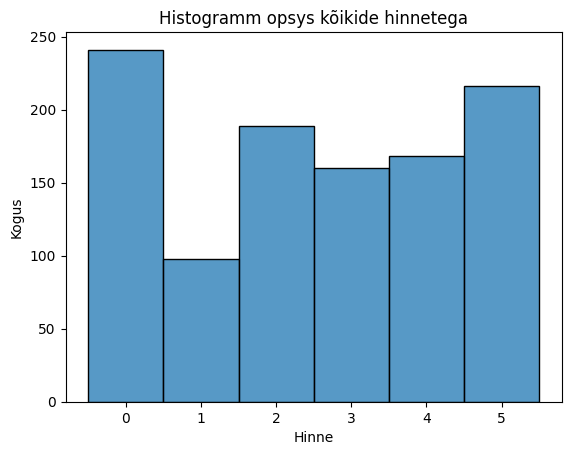

Shapiro-Wilk test opsys kõikide hinnetega - p-val: 1.4938632576930062e-27
Ei ole normaaljaotus


In [128]:
# sorteerime hinnete järgi
OPSYS_sorted = OPSYS.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=OPSYS_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm opsys kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(OPSYS['HINNE_NR'])
print(f'Shapiro-Wilk test opsys kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitney U test

In [129]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in OPSYS['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = OPSYS[(OPSYS['ÕPPEAASTA'] == aasta) & (OPSYS['SUGU'] == 'M')]['HINNE_NR']
  grades_f = OPSYS[(OPSYS['ÕPPEAASTA'] == aasta) & (OPSYS['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('opsys_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     2055.0  0.133613    False
0  2019/20     4534.0  0.603502    False
0  2022/23     6063.0  0.006827     True
0  2021/22     3361.5  0.667664    False
0  2020/21     5931.5  0.044100     True


### Hii ruut

In [130]:
# kontroll, et ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     18  18  22  26  21  24  20
          N      7   5   5   5   4   6   1
2019/20   M     30  36  31  25  17  33  16
          N      8   8   5   8   1  12   4
2020/21   M     46  36  32  27  14  13  22
          N      7   9   7  11   7   4   8
2021/22   M     36  13  19  30  16  12  17
          N     12   8   7   7   5   5   5
2022/23   M     46  25  23  31   7   6  21
          N      6  10   9  19   6   7   5

In [131]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('OPSYS_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,2.050372,0.152169,Ei,51.99,46.50
0,keskmised_hinded,1.503763,0.220093,Ei,25.81,30.04
0,halvad_hinded,0.106818,0.743796,Ei,22.20,23.46
0,A,2.368714,0.123789,Ei,21.23,16.46
0,B,0.080955,0.776007,Ei,15.44,16.46
0,C,0.321253,0.570856,Ei,15.32,13.58
0,D,1.624213,0.202505,Ei,16.77,20.58
0,E,0.005220,0.942402,Ei,9.05,9.47
0,F,1.802733,0.179382,Ei,10.62,13.99
0,MI,0.651098,0.419720,Ei,11.58,9.47


# **Üldine analüüs**

Liidame kokku kõik andmestikud, kuna nendega tehti vahepeal kordusoorituste puhastust, seega algsed andmestikud enam ei sobi

In [132]:
df2 = pd.concat([KM, OOP, ALGOD, DM, AB, OPSYS], axis=0)
df2

,ID,SUGU,AINE,ÕPPEAASTA,SEMESTER,HINNE_EK,KORDUSSOORITUS,HINNE_NR
0,216,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,F,0,0
1,415,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,MI,0,0
2,467,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,F,0,0
3,572,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,D,0,2
4,702,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,A,0,5
...,...,...,...,...,...,...,...,...
7619,1943,M,LTAT.06.001 Operatsioonisüsteemid (6 EAP),2020/21,S,B,0,4
7620,1945,N,LTAT.06.001 Operatsioonisüsteemid (6 EAP),2020/21,S,B,0,4
7621,1947,M,LTAT.06.001 Operatsioonisüsteemid (6 EAP),2020/21,S,D,0,2
7622,1948,M,LTAT.06.001 Operatsioonisüsteemid (6 EAP),2020/21,S,C,0,3


### **Kontrollid ja mõned tabelid üldiselt andmete koguste kohta, palju andmeid saadi jne**

In [133]:
unique_counts = df.groupby('SUGU')['ID'].nunique()
unique_counts2 = df2.groupby('SUGU')['ID'].nunique()

print(unique_counts)
print(unique_counts2)

unique_id_count = df['ID'].nunique()
unique_id_count2 = df2['ID'].nunique()

print("Unikaased ID dfs:", unique_id_count)
print("Unikaalsed IDd df2s:", unique_id_count2)

SUGU
M    1603
N     860
Name: ID, dtype: int64
SUGU
M    1603
N     860
Name: ID, dtype: int64
Unikaased ID dfs: 2463
Unikaalsed IDd df2s: 2463


In [134]:
print(df2.groupby('AINE')['ID'].nunique())

AINE
LTAT.03.003 Objektorienteeritud programmeerimine (6 EAP)    1372
LTAT.03.004 Andmebaasid (6 EAP)                             1238
LTAT.03.005 Algoritmid ja andmestruktuurid (6 EAP)           945
LTAT.06.001 Operatsioonisüsteemid (6 EAP)                    948
LTMS.00.019 Diskreetne matemaatika I (6 EAP)                 915
MTMM.00.340 Kõrgem matemaatika I (6 EAP)                    1888
Name: ID, dtype: int64


In [135]:
print(len(df))
print(len(df2))

8822
8822


In [136]:
#igas õppeaines palju andmeid saadi iga aasta kohta
# metoodika peatüki tabeli jaoks
grades = df2.groupby(["AINE", "ÕPPEAASTA"])["HINNE_EK"].count()
grades.to_excel('hinded_kogus.xlsx')
print(grades)

AINE                                                      ÕPPEAASTA
LTAT.03.003 Objektorienteeritud programmeerimine (6 EAP)  2018/19      340
                                                          2019/20      303
                                                          2020/21      284
                                                          2021/22      247
                                                          2022/23      331
LTAT.03.004 Andmebaasid (6 EAP)                           2018/19      252
                                                          2019/20      245
                                                          2020/21      238
                                                          2021/22      268
                                                          2022/23      374
LTAT.03.005 Algoritmid ja andmestruktuurid (6 EAP)        2018/19      206
                                                          2019/20      240
                                

In [137]:
# Gruppeerime andmed aine ja lõpphinne järgi ning arvutame hinnete kogused
combined_data = pd.crosstab(index=[df2['ÕPPEAASTA'],df2['AINE'], df2['SUGU']], columns=df2['HINNE_EK'])
combined_data.to_excel('hinnetekogused.xlsx', index=True)
print(combined_data)

HINNE_EK                                                             A   B  \
ÕPPEAASTA AINE                                               SUGU            
2018/19   LTAT.03.003 Objektorienteeritud programmeerimin... M      58  51   
                                                             N      21  16   
          LTAT.03.004 Andmebaasid (6 EAP)                    M      58  37   
                                                             N      28  15   
          LTAT.03.005 Algoritmid ja andmestruktuurid (6 EAP) M       8  17   
                                                             N       3   5   
          LTAT.06.001 Operatsioonisüsteemid (6 EAP)          M      18  18   
                                                             N       7   5   
          LTMS.00.019 Diskreetne matemaatika I (6 EAP)       M      21  16   
                                                             N      12   4   
          MTMM.00.340 Kõrgem matemaatika I (6 EAP)           M  

### **Hinnete analüüs ja statistilised näitajad**

In [138]:
# kõikide aastate ning õppeainete peale naiste ja meeste õppetulemuste kogused
cross_tab = pd.crosstab(index=[df2['ÕPPEAASTA'], df2['SUGU']], columns=df2['HINNE_EK'])
cross_tab.to_excel('Koik_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK          A    B    C    D    E    F   MI
ÕPPEAASTA SUGU                                   
2018/19   M     204  157  166  165  171  248  105
          N      98   67   65   67   54   95   48
2019/20   M     285  170  170  137  150  288   83
          N     116   74   51   55   64  122   26
2020/21   M     244  157  157  145  113  282   80
          N      97   79   78   67   45   86   27
2021/22   M     181  138  133  146  173  333   59
          N      79   80   73   68   80  137   19
2022/23   M     245  194  188  165  132  368   71
          N      95  102   75   88   57  160   25


In [139]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = df2.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

# exceli tabeliks
grade_summary.to_excel('koikide_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  2.176809    2.0  1.853700
1   2018/19    N  2.309717    2.0  1.907396
2   2019/20    M  2.368667    2.0  1.949963
3   2019/20    N  2.368110    2.0  1.975273
4   2020/21    M  2.310696    2.0  1.939678
5   2020/21    N  2.534447    3.0  1.845033
6   2021/22    M  1.995701    2.0  1.868062
7   2021/22    N  2.145522    2.0  1.832545
8   2022/23    M  2.220836    2.0  1.914189
9   2022/23    N  2.227575    2.0  1.870972

### **Normaaljaotuse kontroll**

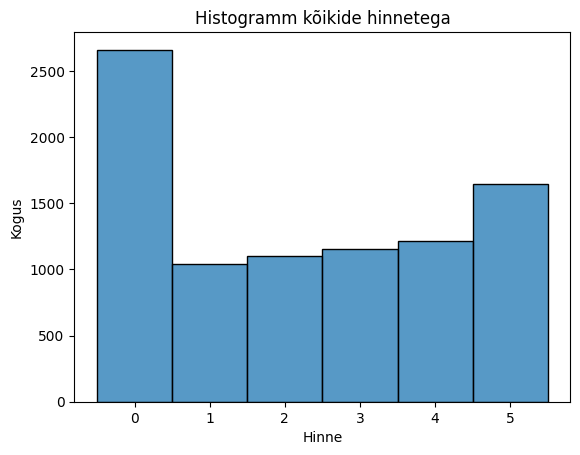

Shapiro-Wilk test kõikide hinnetega - p-val: 0.0
Ei ole normaaljaotus


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [140]:
# sorteerime hinnete järgi
df2_sorted = df2.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=df2_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(df2['HINNE_NR'])
print(f'Shapiro-Wilk test kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### **Mann-Whitney U test**

In [141]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in df2['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = df2[(df2['ÕPPEAASTA'] == aasta) & (df2['SUGU'] == 'M')]['HINNE_NR']
  grades_f = df2[(df2['ÕPPEAASTA'] == aasta) & (df2['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('koikide_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2019/20   325590.5  0.975947    False
0  2018/19   289253.5  0.221136    False
0  2022/23   409386.0  0.938305    False
0  2021/22   296603.0  0.100325    False
0  2020/21   263794.5  0.033960     True


### **Hii ruut test**

In [142]:
cross_tab

HINNE_EK          A    B    C    D    E    F   MI
ÕPPEAASTA SUGU                                   
2018/19   M     204  157  166  165  171  248  105
          N      98   67   65   67   54   95   48
2019/20   M     285  170  170  137  150  288   83
          N     116   74   51   55   64  122   26
2020/21   M     244  157  157  145  113  282   80
          N      97   79   78   67   45   86   27
2021/22   M     181  138  133  146  173  333   59
          N      79   80   73   68   80  137   19
2022/23   M     245  194  188  165  132  368   71
          N      95  102   75   88   57  160   25

In [143]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('koikide_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,2.785922,0.095096,Ei,44.96,46.93
0,keskmised_hinded,0.218524,0.640167,Ei,24.13,24.63
0,halvad_hinded,5.166360,0.023028,Jah,30.90,28.45
0,A,0.023410,0.878394,Ei,18.68,18.52
0,B,7.268591,0.007017,Jah,13.15,15.35
0,C,0.002227,0.962358,Ei,13.12,13.06
0,D,1.443165,0.229628,Ei,12.22,13.17
0,E,0.330274,0.565498,Ei,11.91,11.45
0,F,2.428863,0.119119,Ei,24.49,22.91
0,MI,2.317672,0.127911,Ei,6.42,5.54


# **Moodulite analüüs**

Moodustame uued andmestikud õigete õppeainetega

In [144]:
matad = pd.concat([KM, DM], axis=0)
itkad = pd.concat([AB, OPSYS], axis=0)
proged = pd.concat([OOP, ALGOD], axis = 0)

## **matade analüüs**

### Hinnete analüüs ja statistilised näitajad

In [145]:
# kõikide õpitulemuste aritmeetiline keskmine, mediaan ja standardhälve
grade_summary = matad.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

# exceli tabeliks
grade_summary.to_excel('matade_grade_summary.xlsx')

In [146]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[matad['ÕPPEAASTA'], matad['SUGU']], columns=matad['HINNE_EK'])
cross_tab.to_excel('matad_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D    E    F  MI
ÕPPEAASTA SUGU                              
2018/19   M     62  34  48  72   95  134  35
          N     39  26  24  32   42   62  25
2019/20   M     76  46  50  66   95  131  36
          N     31  28  33  29   51   79  18
2020/21   M     35  36  35  59   63  169  29
          N     21  16  43  38   29   53  15
2021/22   M     30  27  32  68  115  233  18
          N      8   8  22  47   61   98   9
2022/23   M     33  34  49  73   89  275  10
          N     11  15  24  40   40  105   7


### Mann-Whitney U test

In [147]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in matad['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = matad[(matad['ÕPPEAASTA'] == aasta) & (matad['SUGU'] == 'M')]['HINNE_NR']
  grades_f = matad[(matad['ÕPPEAASTA'] == aasta) & (matad['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('matad_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2019/20    69707.0  0.389938    False
0  2018/19    57378.5  0.318197    False
0  2022/23    65663.5  0.384046    False
0  2021/22    63472.0  0.329526    False
0  2020/21    38104.5  0.000291     True


### Hii ruut test

In [148]:
cross_tab

HINNE_EK         A   B   C   D    E    F  MI
ÕPPEAASTA SUGU                              
2018/19   M     62  34  48  72   95  134  35
          N     39  26  24  32   42   62  25
2019/20   M     76  46  50  66   95  131  36
          N     31  28  33  29   51   79  18
2020/21   M     35  36  35  59   63  169  29
          N     21  16  43  38   29   53  15
2021/22   M     30  27  32  68  115  233  18
          N      8   8  22  47   61   98   9
2022/23   M     33  34  49  73   89  275  10
          N     11  15  24  40   40  105   7

In [149]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('matade_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,4.290188,0.038333,Jah,25.16,28.40
0,keskmised_hinded,0.651523,0.419569,Ei,31.90,33.28
0,halvad_hinded,7.031691,0.008008,Jah,42.94,38.32
0,A,0.205777,0.650098,Ei,9.47,8.95
0,B,0.199280,0.655303,Ei,7.10,7.57
0,C,9.834593,0.001713,Jah,8.59,11.88
0,D,1.551315,0.212941,Ei,13.56,15.13
0,E,0.009764,0.921288,Ei,18.34,18.14
0,F,10.564298,0.001153,Jah,37.80,32.30
0,MI,1.088461,0.296812,Ei,5.14,6.02


## **IT ainete analüüs**

### hinnete analüüs ja statistilised näitajad

In [150]:
# kõikide õpitulemuste aritmeetiline keskmine, mediaan ja standardhälve
grade_summary = itkad.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

# exceli tabeliks
grade_summary.to_excel('ITde_grade_summary.xlsx')

In [151]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[itkad['ÕPPEAASTA'], itkad['SUGU']], columns=itkad['HINNE_EK'])
cross_tab.to_excel('itkad_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     76  55  55  41  21  39  40
          N     35  20  18  11   4   9  10
2019/20   M     97  67  62  31  17  78  16
          N     37  20  13  12   1  24   4
2020/21   M     93  71  59  39  14  57  30
          N     36  24  13  16   7  14   8
2021/22   M     75  61  56  42  16  45  24
          N     32  46  30  11   6  10   6
2022/23   M     87  90  89  48  10  45  39
          N     31  52  30  32   8  25   9


### Mann-Whitney U test

In [152]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in itkad['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = itkad[(itkad['ÕPPEAASTA'] == aasta) & (itkad['SUGU'] == 'M')]['HINNE_NR']
  grades_f = itkad[(itkad['ÕPPEAASTA'] == aasta) & (itkad['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('itkad_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19    14937.0  0.020485     True
0  2021/22    19320.0  0.013892     True
0  2022/23    39133.5  0.605615    False
0  2020/21    20065.5  0.292262    False
0  2019/20    19091.0  0.285083    False


### Hii ruut test

In [153]:
cross_tab

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     76  55  55  41  21  39  40
          N     35  20  18  11   4   9  10
2019/20   M     97  67  62  31  17  78  16
          N     37  20  13  12   1  24   4
2020/21   M     93  71  59  39  14  57  30
          N     36  24  13  16   7  14   8
2021/22   M     75  61  56  42  16  45  24
          N     32  46  30  11   6  10   6
2022/23   M     87  90  89  48  10  45  39
          N     31  52  30  32   8  25   9

In [154]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('itde_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,4.138559,0.041917,Jah,61.23,65.81
0,keskmised_hinded,0.102753,0.748550,Ei,15.63,16.27
0,halvad_hinded,7.438519,0.006384,Jah,23.14,17.92
0,A,0.732361,0.392119,Ei,23.98,25.75
0,B,7.447725,0.006352,Jah,19.27,24.40
0,C,1.658889,0.197753,Ei,17.98,15.66
0,D,0.459976,0.497635,Ei,11.26,12.35
0,E,0.146444,0.701957,Ei,4.37,3.92
0,F,2.179083,0.139898,Ei,14.79,12.35
0,MI,4.922493,0.026509,Jah,8.35,5.57


## **proge ainte analüüs**

### hinnete analüüs ja statistilised näitajad

In [155]:
# kõikide õpitulemuste aritmeetiline keskmine, mediaan ja standardhälve
grade_summary = proged.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

# exceli tabeliks
grade_summary.to_excel('progede_grade_summary.xlsx')

In [156]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[proged['ÕPPEAASTA'], proged['SUGU']], columns=proged['HINNE_EK'])
cross_tab.to_excel('proged_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK          A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                             
2018/19   M      66  68  63  52  55  75  30
          N      24  21  23  24   8  24  13
2019/20   M     112  57  58  40  38  79  31
          N      48  26   5  14  12  19   4
2020/21   M     116  50  63  47  36  56  21
          N      40  39  22  13   9  19   4
2021/22   M      76  50  45  36  42  55  17
          N      39  26  21  10  13  29   4
2022/23   M     125  70  50  44  33  48  22
          N      53  35  21  16   9  30   9


### Mann-Whitney U test

In [157]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in proged['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = proged[(proged['ÕPPEAASTA'] == aasta) & (proged['SUGU'] == 'M')]['HINNE_NR']
  grades_f = proged[(proged['ÕPPEAASTA'] == aasta) & (proged['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('proged_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19    27453.0  0.719953    False
0  2019/20    22501.0  0.007378     True
0  2021/22    21485.5  0.316505    False
0  2022/23    34477.0  0.744529    False
0  2020/21    26154.0  0.150308    False


### Hii ruut test

In [158]:
cross_tab

HINNE_EK          A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                             
2018/19   M      66  68  63  52  55  75  30
          N      24  21  23  24   8  24  13
2019/20   M     112  57  58  40  38  79  31
          N      48  26   5  14  12  19   4
2020/21   M     116  50  63  47  36  56  21
          N      40  39  22  13   9  19   4
2021/22   M      76  50  45  36  42  55  17
          N      39  26  21  10  13  29   4
2022/23   M     125  70  50  44  33  48  22
          N      53  35  21  16   9  30   9

In [159]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('proged_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,6.321781,0.011926,Jah,55.50,61.02
0,keskmised_hinded,5.750316,0.016486,Jah,21.96,17.63
0,halvad_hinded,0.361953,0.547424,Ei,22.53,21.35
0,A,1.441215,0.229943,Ei,25.70,28.10
0,B,8.879601,0.002884,Jah,15.32,20.25
0,C,1.294809,0.255164,Ei,14.49,12.67
0,D,0.238573,0.625238,Ei,11.37,10.61
0,E,7.314534,0.006840,Jah,10.59,7.02
0,F,0.039580,0.842305,Ei,16.25,16.67
0,MI,2.168486,0.140865,Ei,6.28,4.68
